<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Download-Historical-Data" data-toc-modified-id="Download-Historical-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Download Historical Data</a></span><ul class="toc-item"><li><span><a href="#Compute-Annual-Retruns" data-toc-modified-id="Compute-Annual-Retruns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Compute Annual Retruns</a></span></li><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li></ul></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Sharpe-Ratios" data-toc-modified-id="Sharpe-Ratios-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sharpe Ratios</a></span></li><li><span><a href="#Sharpe-weights" data-toc-modified-id="Sharpe-weights-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sharpe weights</a></span></li><li><span><a href="#Stats-of-the-above-portfolio" data-toc-modified-id="Stats-of-the-above-portfolio-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Stats of the above portfolio</a></span></li><li><span><a href="#Should-everyone-buy-this?" data-toc-modified-id="Should-everyone-buy-this?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Should everyone buy this?</a></span></li><li><span><a href="#Customer's-choice" data-toc-modified-id="Customer's-choice-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Customer's choice</a></span></li><li><span><a href="#Is-it-on-the-MVF?" data-toc-modified-id="Is-it-on-the-MVF?-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Is it on the MVF?</a></span></li><li><span><a href="#Stats-of-new-portfolio" data-toc-modified-id="Stats-of-new-portfolio-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Stats of new portfolio</a></span></li><li><span><a href="#Q4-again,-but-with-a-risk-free-asset" data-toc-modified-id="Q4-again,-but-with-a-risk-free-asset-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Q4 again, but with a risk-free asset</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#CAPM-Formula" data-toc-modified-id="CAPM-Formula-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>CAPM Formula</a></span></li><li><span><a href="#Market-Betas" data-toc-modified-id="Market-Betas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Market Betas</a></span></li><li><span><a href="#Expected-Price" data-toc-modified-id="Expected-Price-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Expected Price</a></span></li><li><span><a href="#New-Asset" data-toc-modified-id="New-Asset-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>New Asset</a></span></li><li><span><a href="#Do-we-want-it?" data-toc-modified-id="Do-we-want-it?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Do we want it?</a></span></li></ul></li><li><span><a href="#Question-3" data-toc-modified-id="Question-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 3</a></span><ul class="toc-item"><li><span><a href="#Decompose-the-error" data-toc-modified-id="Decompose-the-error-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decompose the error</a></span></li><li><span><a href="#What-if-$\rho-=-1$?" data-toc-modified-id="What-if-$\rho-=-1$?-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>What if $\rho = 1$?</a></span></li><li><span><a href="#Effect-of-Diversification" data-toc-modified-id="Effect-of-Diversification-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Effect of Diversification</a></span></li><li><span><a href="#Accept-or-reject-1" data-toc-modified-id="Accept-or-reject-1-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Accept or reject 1</a></span></li><li><span><a href="#Accept-or-reject-2" data-toc-modified-id="Accept-or-reject-2-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Accept or reject 2</a></span></li></ul></li></ul></div>

In [1]:
import pymc as pm
import numpy as np
import yfinance as yf
import pandas as pd
from pandas_datareader import famafrench

SEED = sum(map(ord, 'MBFA CC2 2023'))
rng = np.random.default_rng(SEED)

# Download Historical Data

In [2]:
ff_retval = famafrench.FamaFrenchReader('F-F_Research_Data_Factors_daily', start='1900', end='2023-12-09').read()
ff_df = ff_retval[0]

/tmp/ipykernel_5806/2871876382.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_retval = famafrench.FamaFrenchReader('F-F_Research_Data_Factors_daily', start='1900', end='2023-12-09').read()


In [3]:
df = yf.tickers.Tickers(['AAPL', 'JPM', 'PG', 'WDFC']).download(start='1900-01-01', end='2023-12-09', interval='1d')

[*********************100%%**********************]  4 of 4 completed


## Compute Annual Retruns

In [4]:
# Keep only the adjusted closing prices  
df_close = df['Close'].dropna(how='any')

# Covert daily returns to monthly
df_returns = df_close.pct_change().resample('M').agg(lambda x: (1 + x).prod() - 1)

# Use only the last 5 years of monthly data
five_year_idx = df_returns.index.shift(-12 * 5)[-1]

## Descriptive Statistics

On the test I gave the names of the assets as "Asset 1", "Asset 2", and "Asset 3", but they are real data from three companies:

- Asset 1: Apple (APPL) - Technology Sector
- Asset 2: JP Morgan-Chase (JPM) - Banking Sector
- Asset 3: Proctor and Gamble (PG) - Consumer Goods Sector

In [5]:
cov1 = df_returns.loc[five_year_idx:].drop(columns=['WDFC']).cov()
mu1 = df_returns.loc[five_year_idx:].drop(columns=['WDFC']).mean()

In [6]:
mu1.to_frame(name='mean_return').round(4)

,mean_return
AAPL,0.0289
JPM,0.0117
PG,0.0104


In [7]:
cov1.round(4)

,AAPL,JPM,PG
AAPL,0.0077,0.0031,0.0020
JPM,0.0031,0.0068,0.0012
PG,0.0020,0.0012,0.0026


# Exercise 1

## Q1

**(1.0 pt) Which individual asset has the best Sharpe ratio? (Since there is no risk free asset, use r_f=0)**

Use the Sharpe ratio formula:

$$S_i = \frac{\mathbb E[r_i] - r_f}{\sigma_i}$$


To do this use the main diagonal of the covariance matrix, and don't forget to take the square root!!

In [8]:
mu1 / np.sqrt(np.diag(cov1))

AAPL    0.330623
JPM     0.141966
PG      0.203152
dtype: float64

Asset 1 (APPL) has the best Sharpe ratio over this period.

## Q2

**(2.0 pt) Compute the weights associated with the portfolio with the best possible shape ratio in this market.**

"Best possible sharpe ratio" mean the maximum sharpe ratio. To get these weights, we know the equation is: 

$$\mu - r_f = \Sigma Z$$

Where $Z$ are the un-normalized weights. To get the weights, just have to do:

$$w = \frac{Z}{\sum_i Z_i}$$

To solve for $Z$, multiply both sides by $Z^{-1}$. We also know $r_f = 0$, so the equation to solve is:

$$ Z = \Sigma^{-1} \mu$$

First, here's the inverse matrix:

In [9]:
cov_inv1 = pd.DataFrame(np.linalg.inv(cov1), index=cov1.index, columns=cov1.columns)
cov_inv1.round(4)

,AAPL,JPM,PG
AAPL,188.2191,-67.1433,-114.1061
JPM,-67.1433,184.1906,-30.7719
PG,-114.1061,-30.7719,480.1914


### Aside: Numerical stability of inverse

The matrix inverse operation is a very, very unstable operation. Taking the inverse of the rounded values (which is what you have on the test) will give you a much different answer.

Well it's not that different, but perhaps you'd be surprised by how different it is, just by rounding to the 4th decimal.

In [10]:
pd.DataFrame(np.linalg.inv(cov1.round(4)), index=cov1.index, columns=cov1.columns)

,AAPL,JPM,PG
AAPL,185.088099,-64.507306,-112.602858
JPM,-64.507306,182.580748,-34.647033
PG,-112.602858,-34.647033,487.223906


To prove to you that I gave you the right answer, here's verification $\Sigma^{-1} \Sigma = I$

In [11]:
(cov_inv1 @ cov1).round(4)

,AAPL,JPM,PG
AAPL,1.0,0.0,-0.0
JPM,-0.0,1.0,-0.0
PG,-0.0,-0.0,1.0



Aside over. Anyway here's the correct answer:

In [12]:
Z = cov_inv1 @ mu1
w_tan = Z / Z.sum()
w_tan

AAPL    0.736932
JPM    -0.023823
PG      0.286891
dtype: float64

## Q3

**(1.0 pt) What is the mean, standard deviation, and Sharpe ratio associated with the maximum Sharpe portfolio?**

Use the weights we just computed:

$$\begin{align} \mu_p &= w \mu \\
                \sigma^2_p &= w^T \Sigma w \end{align}$$

But be careful, I ask for standard deviation, so you have to take the square root of the variance. Also you can use the Sharpe ratio formula again, $S_p = \frac{\mu_p}{\sigma_p}$

In [13]:
mu_tan = w_tan @ mu1
sigma_tan = np.sqrt(w_tan @ cov1 @ w_tan)
print(f'Tangency return: {mu_tan:0.4f}')
print(f'Tangency volatility: {sigma_tan:0.4f}')
print(f'Tangency Sharpe ratio: {mu_tan / sigma_tan:0.4f}')

Tangency return: 0.0240
Tangency volatility: 0.0714
Tangency Sharpe ratio: 0.3363


## Q4

**(1.0 pt) Assume all investors behave according to a mean-variance utility function. Should every investor in this market purchase the maximum Sharpe portfolio? Why not why not? (Maximum 3 sentences!)**

No. Since there's no risk-free asset, we can't use this one portfolio to deliver the best returns given risk (or risk given return) to a customer. Although everyone is maximizing her utility function, everyone will have different values of $A$, the risk-aversion parameter! Only people with a level of $A$ such that the amount of risk they want to hold is equal to 0.0714 will buy the maximum sharpe portfolio.

## Q5

**(1.0 pt) A customer comes to you with an existing portfolio $w_c=\begin{bmatrix} 0.2 & 0.5 & 0.3 \end{bmatrix}^T$.  Compute the expected return and volatility associated with his portfolio**

We have the weights, so just apply the same formulas as above.

In [14]:
w_c = np.array([0.2, 0.5, 0.3])
mu_c = w_c @ mu1
sigma_c = np.sqrt(w_c @ cov1 @ w_c)
print(f"Customer's return: {mu_c:0.4f}")
print(f"Customer's volatility: {sigma_c:0.4f}")

Customer's return: 0.0148
Customer's volatility: 0.0588


## Q6

**(2.0 pt) Is his portfolio on the mean-variance efficient frontier? If not, what portfolio can you propose to him that is strictly better (delivers the same return for lower risk)?**

It's important to realize that aside from the mean-variance efficient portfolios we're used to computing, there are infinity other portfolios that live inside the Markowitz bullet.

To emphasize this point, the next code cell samples 1 million long-only portfolios comprised of the 3 assets in this question and plots them.

In [15]:
import numba as nb

# njit is a way to accelerate python code. We need it so we can draw tons of weights
@nb.njit(parallel=True)
def make_random_portfolios(mu, cov, n_portfolios):
    # Dirchlet is a distribution over a n-dimensional simplex
    # In english: it draws n numbers that always add up to 1.
    weights = np.random.dirichlet(alpha=[1, 1, 1], size=(n_portfolios, ))
    
    # Allocate memory for the output
    mus = np.empty(n_portfolios)
    sigmas2 = np.empty(n_portfolios)
    
    # For each random set of weights, compute the mean and variance of the resulting portfolio
    for t in nb.prange(n_portfolios):
        w = weights[t]
        mus[t] = w @ mu
        sigmas2[t] = w @ cov @ w
    
    # Compute all the sharpes in one go
    sharpes = mus / np.sqrt(sigmas2)
    return mus, sigmas2, sharpes

In [16]:
mus, sigmas2, sharpes = make_random_portfolios(mu1.values, cov1.values, 1_000_000)

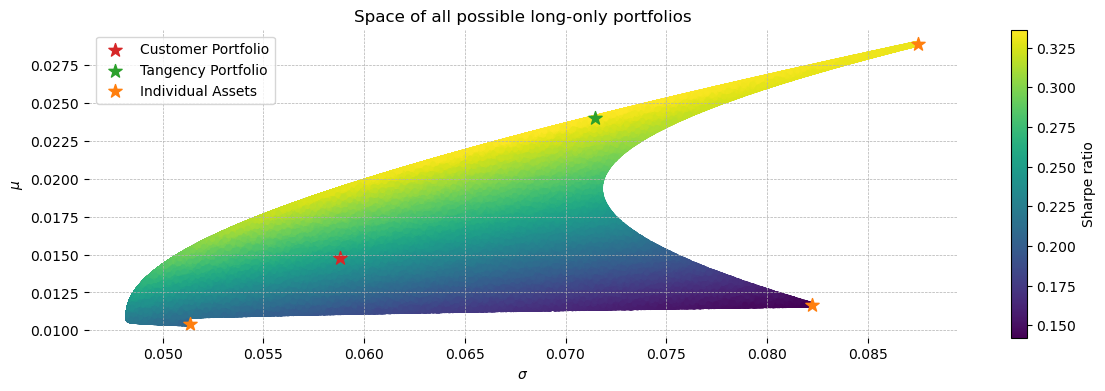

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))
[spine.set_visible(False) for spine in ax.spines.values()]
ax.grid(ls='--', lw=0.5)
scatter = ax.scatter(np.sqrt(sigmas2), mus, s=10, c=sharpes)
fig.colorbar(scatter, label='Sharpe ratio')
ax.set(xlabel=r'$\sigma$', ylabel='$\mu$', title='Space of all possible long-only portfolios')

ax.scatter(sigma_c, mu_c, s=100, c='tab:red', marker='*', label='Customer Portfolio')
ax.scatter(sigma_tan, mu_tan, s=100, c='tab:green', marker='*', label='Tangency Portfolio')
ax.scatter(np.sqrt(np.diag(cov1)), mu1, s=100, c='tab:orange', marker='*', label='Individual Assets')
ax.legend(loc='upper left')
plt.show()

Graphically, we can see that his portfolio is not on the MVF (it's the red star). How could you have known that though? Well, you could compute the minimum variance portfolio assocaited with his returns and check if it's the same as his portfoilo.

To do this, I use the A, B, C, D method:

In [18]:
A = (mu1 @ cov_inv1).sum()
B = mu1 @ cov_inv1 @ mu1
C = cov_inv1.sum().sum()
D = B * C - A ** 2

g = (B * cov_inv1.sum(axis=1) - A * cov_inv1 @ mu1) / D
h = (C * cov_inv1 @ mu1 - A * cov_inv1.sum(axis=1)) / D

w_c_mvf = g + mu_c * h
w_c_mvf

AAPL    0.224468
JPM     0.136272
PG      0.639260
dtype: float64

So we see that the minimum variance weights we compute are not the same as the customer's portfolio. Since:

1. There is only ONE minimum variance portfolio associated with every level of return, and;
2. The MVF weights at $\mu_c = 0.0148$ are not the weights the client chose; 

We conclude his portfolio is not a minimum variance portfolio.

In [19]:
# As a sanity check, we can compute that the portfolio we constructed has the same return as his
# it's good to do this just to make sure we didn't make any math error
print(f"Check that the new portfolio has the same return as the customer's portfolio: {np.allclose(w_c_mvf @ mu1, mu_c)}")

Check that the new portfolio has the same return as the customer's portfolio: True


## Q7

**(1.0 pt) What is the mean and volatility associated with your proposed portfolio?**

Well, the mean is the same as his, because we built it that way. So this question is really just asking about the volatility. Use the same equations as always:

In [20]:
mu_c_mvf = w_c_mvf @ mu1
sigma_c_mvf = np.sqrt(w_c_mvf @ cov1 @ w_c_mvf)
print(f"Return of the improved portoflio: {mu_c_mvf:0.4%}")
print(f"Volatility of the improved portoflio: {sigma_c_mvf:0.4%}")

Return of the improved portoflio: 1.4753%
Volatility of the improved portoflio: 5.0643%


The question doesn't ask for this, but it's nice to check the differences. Of course the mean is the same, but we can also see that we reduce his risk by 0.8%.

In [21]:
print(f"Change in mean: {mu_c - mu_c_mvf:0.4%}")
print(f"Change in volatility: {sigma_c - sigma_c_mvf:0.4%}")

Change in mean: 0.0000%
Change in volatility: 0.8140%


## Q8

**8. (1.0 pt) Now assume the market has a risk-free asset. Does your answer to question 4 change? Why not why not? (Maximum 3 sentences – no need to re-compute weights!)**

If there is a risk-free asset, now everyone should buy the tangency portfolio. This is the famous **two-fund theorem**. Then they can use the risk-free asset to leverage up or down the Capital Market Line, obtaining better returns than any portfolio on the old mean-variance frontier.

# Exercise 2

## Data preparation

For this exercise I use data on the market portfolio and the risk-free rate from Kenneth French's website. He provides daily data, so I need to aggretate it to monthly.

The I compute excess returns $\tilde r_{i, t} = r_{i, t} - r_{f,t}$

In this case, the $i$ index also includes the market.

In [22]:
ff_monthly = ff_df.mul(1e-2).resample('M').agg(lambda x: (1 + x).prod() - 1)
assert ff_monthly.index.freq == df_returns.index.freq
df_joined = df_returns.join(ff_monthly).dropna()
rf = df_joined["RF"]
excess_returns = df_joined[df_returns.columns] - rf.values[:, None]
excess_returns = excess_returns.join(ff_monthly['Mkt-RF'])

Here's what excess monthly returns over the past 5 years look like for these stocks.

This also includes asset 4, which is WDFC, the WD-40 company. They're an industrial lubricant company I found by googling "companies with negative beta" :)

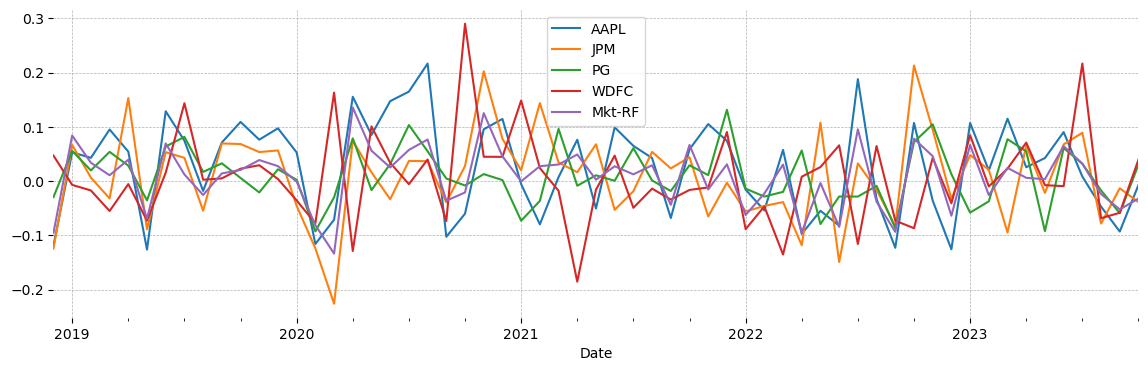

In [23]:
fig, ax = plt.subplots(figsize=(14,4))
[spine.set_visible(False) for spine in ax.spines.values()]
excess_returns.loc[five_year_idx:].plot(ax=ax)
ax.grid(ls='--', lw=0.5)

plt.show()

Compute the covariance matrix for this question, and a new mean vector

In [24]:
cov2 = excess_returns.loc[five_year_idx:].cov()
mu2 = excess_returns.loc[five_year_idx:].mean()

In [25]:
mu2.round(4)

AAPL      0.0261
JPM       0.0084
PG        0.0099
WDFC      0.0064
Mkt-RF    0.0081
dtype: float64

In [26]:
cov2.round(4)

,AAPL,JPM,PG,WDFC,Mkt-RF
AAPL,0.0078,0.0031,0.0021,-0.0003,0.0040
JPM,0.0031,0.0068,0.0012,0.0003,0.0035
PG,0.0021,0.0012,0.0027,0.0003,0.0013
WDFC,-0.0003,0.0003,0.0003,0.0068,-0.0004
Mkt-RF,0.0040,0.0035,0.0013,-0.0004,0.0032


The market covaraince data is just the column (or row) of the covariance matrix assocaited with the market return (called "Mkt-RF" in the French database).

In [27]:
cov2['Mkt-RF']

AAPL      0.004038
JPM       0.003518
PG        0.001308
WDFC     -0.000362
Mkt-RF    0.003196
Name: Mkt-RF, dtype: float64

## Q1

**(0.5 pt) Write down the CAPM pricing formula.**

Free points!

$$\mathbb E[r_i - r_f] = \alpha_i + \beta_i \mathbb E[r_m - r_f]$$

Correct answers should NOT add an $\epsilon_i$ to this equation, because we have already taken expectations and $\mathbb E[\epsilon_i] = 0$!

I would also accept $r_i = r_f + \beta (r_m - r_f) + \epsilon_i$, but ONLY if you didn't write the expectation operators. This is the "regression form" of the CAPM.

## Q2

**(1.0 pt) What is the CAPM β coefficient associated with asset 1?**

We know that $\beta = \frac{\sigma_{i,m}}{\sigma^2_m}$, so just use that formula.

In [28]:
q1_stocks = ['AAPL', 'JPM', 'PG']
σ2_mkt = cov2.loc['Mkt-RF', 'Mkt-RF']
σ_im = cov2['Mkt-RF']
betas  = σ_im / σ2_mkt
betas[q1_stocks]

AAPL    1.263527
JPM     1.100768
PG      0.409261
Name: Mkt-RF, dtype: float64

AAPL is asset 1, so the answer is $\beta_1 = 1.2635$

## Q3

**(2.0 pt) The current prices and expected prices are given as follows:**

In [29]:
print('Current Prices:')
P0 = df_close.iloc[-1][q1_stocks]
print(P0.to_string())

Current Prices:
AAPL    195.710007
JPM     158.520004
PG      145.149994


**You check analyst expectations for the prices next month, and they are:**

In [30]:
print('Expected Prices:')
E_P1 = pd.Series([190., 160., 150.], index=q1_stocks)
print(E_P1.to_string())

Expected Prices:
AAPL    190.0
JPM     160.0
PG      150.0


**According to the CAPM, is asset 1 underpriced or overpriced today?**


We use
$$\mathbb E[P_{t+1}] = (1 + \mathbb E[r_{t+1}]) P_t$$ 

Re-arrange to obtain:

$$P_t = \frac{\mathbb E[P_{t+1}]}{1 + \mathbb E[r_{t+1}]}$$

We will use the CAPM to compute $\mathbb E[r_{t+1}]$. Recall that I already subtracted the risk-free rate from the returns, so I just have to get $\beta_1 (r_m - r_f)$

In [31]:
expected_return = betas * mu2['Mkt-RF']
CAPM_P0 = E_P1 / (1 + rf.values[-1] + expected_return[q1_stocks])
CAPM_P0

AAPL    187.219926
JPM     157.863647
PG      148.818354
dtype: float64

Here are the prices computed by the formula. The question only asks for APPL, so the answer is that it is **overpriced** today. That's because the current price we observe in the market is *above* the price that is suggested by the CAPM when looking at the analyist forecasts. 

Here's a little table of results for all the stocks. Obviously you didn't have to compute all this on the test; it's including to help you understand how the analysis looks:

In [32]:
overpriced = P0[q1_stocks] > CAPM_P0
overpriced.name = 'Overpriced?'
difference = P0[q1_stocks] - CAPM_P0
difference.name = 'Mkt - CAPM'

overpriced.to_frame().join(difference)

,Overpriced?,Mkt - CAPM
AAPL,True,8.490081
JPM,True,0.656357
PG,False,-3.668360


AAPL and JPM are over priced according to the CAPM, because their observed market prices are lower than the price the formula gives. We should avoid buying these, or consider shorting them. PG is underpriced, so we can consider buying it.

## Q4

**(0.5 pt) We now introduce a new asset to the market, asset 4, with $\sigma_{4,m} = -0.0003$. What is the beta of this new asset?**

This is just using the beta formula again. Just be looking the covariance we know the beta is going to be negative.

In [33]:
print(f"New asset covariance with market: {σ_im.round(4)['WDFC']:0.4f}")
print(f"New asset market beta: {betas['WDFC']:0.4f}")

New asset covariance with market: -0.0004
New asset market beta: -0.1132


## Q5

**(1.0 pt) Suppose the expected return of the new asset 4 is μ_4=0.0068. What is the excess return of this asset? Do we want to hold this asset as part of an investment portfolio? Why or why not (maximum 3 sentences!)**

The line about the returns of the asset is there to distract you. This stock has a beta of -0.11. This is notable because negative beta is rare, and these assets are known as "hedge assets". Adding it to a portfolio will increase the sharpe ratio by reducing the correlation between the portfolio and the market, thus reducing our total portfolio risk. Thus we want to hold it, even if the expected returns are at or below the risk-free rate (in this case expected returns are zero).

# Exercise 3

Assume there are many assets available in the market, as well as a risk free asset. Assume that returns for all assets in the market are priced by the CAPM, along with a random error ε_i∼N(0,σ_(ε,i)^2 ). The errors are not correlated, so Cov(ε_i,ε_j )=0.

## Q1

**(1 pt) Use the CAPM (with the error) to decompose the variance of an asset i into a systematic part and an idiosyncratic part.**

Call $r_i$ and $r_m$ the excess returns of asset $i$ and the market, respectively. The CAPM states that:

$$r_i = \alpha_i + \beta_i r_m + \varepsilon_i$$

Take the variance of both sides:

$$\begin{align}
\text{Var}(r_i) &= \text{Var}(\alpha_i + \beta_i r_m + \varepsilon_i) \\
\sigma_i^2 = \beta_i^2 \sigma_m^2 + \sigma^2_{\varepsilon, i}
\end{align}$$

We see that the variance of the asset is equal to it's comovement with the market ($\beta_i^2 \sigma_m^2$, the systematic part) and $\sigma_{\varepsilon, i}^2$, an ideosyncratic part.

**Remark**: You could also write the regression as $r_i = r_f + \beta_i (r_m - r_f) + \varepsilon_i$ and it would not change the final analysis, because $r_f$ is a deterministic value. We saw in TD that $\text{Var}(X - a) = \text{Var}(X)$.

## Q2

**(1 pt) If the correlation between the asset i and the market portfolio ρ, is 1, which risk part, systematic or idiosyncratic, will remain? Justify your answer (maximum 2 sentences!)**

To make $\rho$ appear in the formula, use $\beta = \frac{\sigma_{i,m}}{\sigma_m^2}$, as well as $\sigma_{i,m} = \rho \sigma_i \sigma_m$. Then we have:

$$\begin{align}\beta^2 &= \frac{\rho^2 \sigma_i^2 \sigma_m^2}{\sigma_m^4}\\
\beta^2 \sigma_m^2 &= \rho^2 \sigma_i^2 \end{align}$$

Plug this into the formula from part 1:

$$\begin{align} \sigma_i^2 &= \rho^2 \sigma_i^2 + \sigma_{\varepsilon, i}^2 \\
\sigma_{\varepsilon, i}^2 &= (1 - \rho^2) \sigma_i^2 \end{align}$$

We see that if $\rho = 1$, the ideosyncratic component $\sigma_{\varepsilon, i}^2$ will be zero. Thus we conclude that only the systematic part will remain.

## Effect of Diversification

We are given:

$$\sigma_i^2 = \frac{1}{N}\bar \sigma^2 + \frac{N - 1}{N} \bar{\text{Cov}}$$

## Q3

**(1 pt) Use this expression to show the effect of diversification on portfolio risk.**

Taking the limit of this expression as $N \to \infty$ shows that $\sigma_i^2 = \bar{\text{Cov}}$. Thus as we diversify, the ideosyncratic component vanishes and we are left with only the systematic component (i.e. the co-movement between the market and the asset $i$, captured by the covariance).

## Q4

**(1 pt) Accept or reject the following proposition: A well-diversified portfolio contains about 30 assets (maximum 3 sentences!)**
 
The key insight is that the function $\sigma_i^2 = \frac{1}{N}\bar \sigma^2 + \frac{N - 1}{N} \bar{\text{Cov}}$ decreases very quickly in N towards the limiting value: Note that $\frac{\partial \sigma_i^2}{\partial N}$ will be quadratic in $N$. Thus we cannot get big diversification gains forever by just adding more assets. 30 is a fine number, because the marginal returns from diversification will be very small by then ($\frac{1}{30^2} = 0.001$ is already a tiny marginal effect!) .

## Q5

**(1 pt) Accept or reject the following proposition: For risk control, it is better to reduce the correlation between a portfolio and the market risk than to add 1 more asset to a well-diversified portfolio. (maximum 3 sentences!)**

If a portfolio is well diversified, we are by definition close to the limit of $\sigma_i^2 = \bar{\text{Cov}}$. We know that $\text{Cov}(x,y) = \rho_{x,y} \sigma_x \sigma_y$. Since everything is equal weights, $\sigma_x = \sigma_y = \bar \sigma$ and $\rho_{x,y} = \bar \rho$. We can re-write this expression as:

$$\sigma_i^2 = \bar \rho \bar \sigma^2 $$

We can see that if we can somehow reduce the $\bar \rho$ in our asset, then the systematic risk -- the only remaining risk! -- will go down. One way to do this is to find a hedge asset with negative beta and adding it to our portfolio. For risk control, this will be much more benefitial than adding another asset that is correlated with the market.